# Atividade: Análise de Rede Aérea com USAir97

## Objetivo

Investigar a estrutura da rede de conexões entre aeroportos dos EUA em 1997, utilizando métricas de centralidade e densidade para identificar os aeroportos mais influentes e entender o grau de conectividade da malha aérea.

## Dataset

- Fonte: [Network Repository – USAir97](https://networkrepository.com/USAir97.php)
- Formato: Matrix Market (.mtx)
- Descrição: Grafo não direcionado e ponderado com 332 nós (aeroportos) e
2.100 arestas (rotas)

# Etapas da atividade

1. Carregar o grafo
  - Utilizar scipy.io.mmread para ler o arquivo .mtx
  - Construir o grafo com networkx.from_scipy_sparse_array

In [ ]:
!wget http://nrvis.com/download/data/misc/USAir97.zip
!unzip "./USAir97.zip"

--2025-09-09 15:21:11--  http://nrvis.com/download/data/misc/USAir97.zip
Resolving nrvis.com (nrvis.com)... 74.208.236.139, 2607:f1c0:100f:f000::200
Connecting to nrvis.com (nrvis.com)|74.208.236.139|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://nrvis.com/download/data/misc/USAir97.zip [following]
--2025-09-09 15:21:11--  https://nrvis.com/download/data/misc/USAir97.zip
Connecting to nrvis.com (nrvis.com)|74.208.236.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11099 (11K) [application/zip]
Saving to: ‘USAir97.zip’

USAir97.zip         100%[===================>]  10.84K  --.-KB/s    in 0s      

2025-09-09 15:21:11 (312 MB/s) - ‘USAir97.zip’ saved [11099/11099]

Archive:  ./USAir97.zip
  inflating: USAir97.mtx             
  inflating: readme.html             


In [ ]:
import networkx as nx
from scipy.io import mmread

In [ ]:
# Caminho para o arquivo USAir97.mtx (baixe e salve localmente)
# ou carregue via google drive
matrix = mmread("./USAir97.mtx")

# Converte a matriz esparsa em grafo
# G agora é um grafo do networkx
G = nx.from_scipy_sparse_array(matrix)

#Exibe informações
print(f"{G} and{'' if G.is_directed else ' not'} is directed")

Graph with 332 nodes and 2126 edges and is directed


2. Calcular métricas
  - Centralidade de grau: Identificar os aeroportos com maior número de
conexões
  - Centralidade de betweenness: Detectar os nós que atuam como
“pontes” entre diferentes regiões da rede
  - Densidade da rede: Avaliar o quão conectada é a rede como um todo

In [ ]:
# Calcular a centralidade de grau
G_degree = nx.degree_centrality(G)

# Identificando os 5 aeroportos com maior número de conexões
top_5_degree = sorted(G_degree.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 aeroportos por centralidade de grau:")
for airport, centrality in top_5_degree:
    print(f"{airport}: {centrality:.4f}")


# Calcular a centralidade de betweenness
G_betweenness = nx.betweenness_centrality(G)

# Detectando os nós que atuam como “pontes” entre diferentes regiões da rede
top_5_betweenness = sorted(G_betweenness.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nTop 5 nós por centralidade de betweenness (pontes da rede):")
for node, centrality in top_5_betweenness:
    print(f"{node}: {centrality:.4f}")

Top 5 aeroportos por centralidade de grau:
117: 0.4199
260: 0.3565
254: 0.3051
151: 0.2840
181: 0.2840

Top 5 nós por centralidade de betweenness (pontes da rede):
117: 0.2083
7: 0.1701
260: 0.1532
200: 0.0942
46: 0.0928


3. Análise e interpretação
  - Quais são os aeroportos mais centrais?
  - Existe algum aeroporto que conecta regiões desconectadas?
  - A rede é densa ou esparsa? O que isso indica sobre a malha aérea?

In [ ]:
# Identificar quais são os aeroportos mais centrais

# Unir as duas listas (grau + betweenness)
top_centrality = set([node for node, _ in top_5_degree] + [node for node, _ in top_5_betweenness])

print("Aeroportos mais centrais:")
for node, centrality in top_5_betweenness:
    print(f"{node}")


# Identificar existe algum aeroporto que conecta regiões desconectadas
articulation_points = list(nx.articulation_points(G))

if articulation_points:
    print("\nAeroportos que conectam regioes desconectadas (pontos criticos):")
    for ap in articulation_points:
        print(ap)
else:
    print("\nNao ha aeroportos criticos que desconectariam a rede ao serem removidos.")


# Identificar a rede é densa ou esparsa. O que isso indica sobre a malha aérea?
density = nx.density(G)
print(f"\nDensidade da rede: {density:.4f}")

if density < 0.1:
    print("A rede é esparsa → poucos voos diretos → dependente de conexões")
elif density > 0.5:
    print("A rede é densa → muitos voos diretos → maior redundância")
else:
    print("A rede tem densidade intermediária → existe conectividade razoável, mas ainda depende de algumas conexões")

Aeroportos mais centrais:
117
7
260
200
46

Aeroportos que conectam regioes desconectadas (pontos criticos):
7
12
25
138
173
212
141
180
320
312
326
328
231
260
257
162
181
247
200
165
229
220
254
151
117
66
46

Densidade da rede: 0.0387
A rede é esparsa → poucos voos diretos → dependente de conexões


4. Visualização (opcional)
  - Criar um grafo com matplotlib
  - Destacar os nós com maior centralidade (tamanho ou cor)

In [ ]:
import matplotlib.pyplot as plt

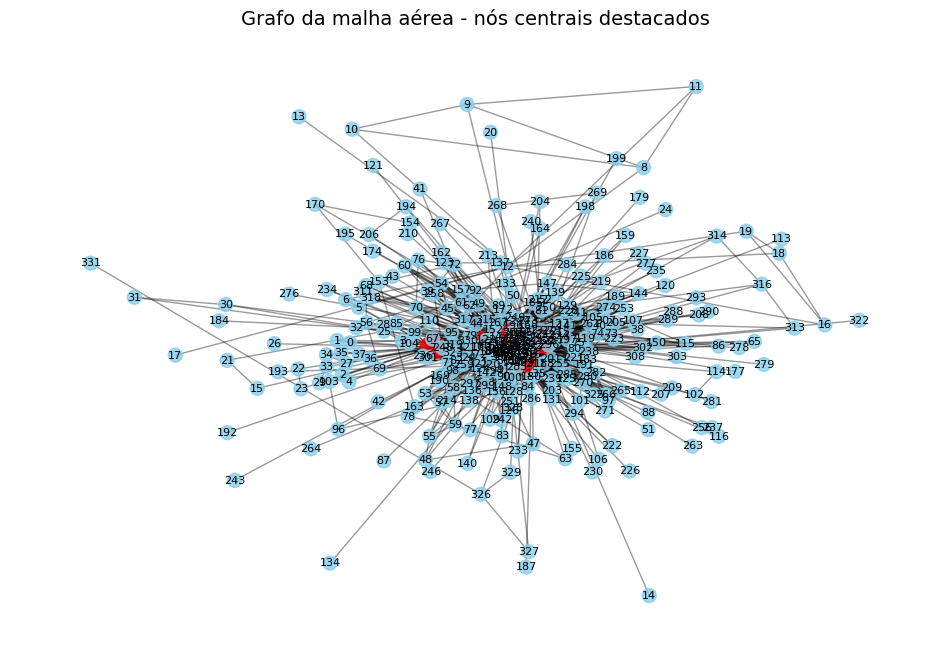

In [ ]:
# Posicionamento dos nós (layout)
pos = nx.spring_layout(G)

# Definindo cores e tamanhos
node_colors = ["red" if node in top_centrality else "skyblue" for node in G.nodes()]
node_sizes = [300 if node in top_centrality else 100 for node in G.nodes()]

# Desenhando o grafo
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Grafo da malha aérea - nós centrais destacados", fontsize=14)
plt.axis("off")
plt.show()

---

### Reflexão:
- Como essas métricas podem ser usadas para otimizar rotas aéreas?
- O que aconteceria se um dos aeroportos mais centrais fosse fechado?
- Como essas análises se aplicam a outras redes (social, logística, etc.)?

---

#### Como essas métricas podem ser usadas para otimizar rotas aéreas?

As métricas de centralidade permitem identificar os aeroportos mais importantes para criar novas rotas onde há baixa conectividade e reduzir a dependência de poucos hubs, tornando a malha aérea mais eficiente.


#### O que aconteceria se um dos aeroportos mais centrais fosse fechado?

O fechamento de um aeroporto central aumentaria o tempo de viagem, exigiria mais conexões, poderia fragmentar a rede e sobrecarregar outros aeroportos, causando atrasos e menor eficiência na malha aérea.


#### Como essas análises se aplicam a outras redes (social, logística, etc.)?

Em redes sociais ajudam a encontrar influenciadores e pontos de propagação de informação, em logística identificam rotas e armazéns críticos para planejar redundância, e em redes de computadores revelam pontos únicos de falha que precisam de proteção para manter a conectividade.